# Exploring 3D ROCurves

Traditionally ROC curves are 2D - signal and background. But our MVA currently has three variables. What can we do in order to understand the ROC curves for that sort of a situation?

## Initalization

In [130]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14) # Font size for titles and axes, default is 10
from mpl_toolkits.mplot3d import Axes3D # if this isn't done then the 3d projection isn't known. Aweful UI!

## Loading Data

Data is stored in a directory somewhere on the server machine. So this is not likely to be portable.
The job number is also kept seperate to make it easy to update everything.

In [3]:
data_location = "C:\\Users\\Gordon\\Documents\\Code\\calratio2017\\MCAResultsData"
jenkins_build = 132

In [25]:
signal_sample_names=["125pi25lt5m", "200pi25lt5m", "400pi50lt5m", "600pi150lt5m", "1000pi400lt5m"]
bib_sample_names=["data15", "data16"]
mj_sample_names=["jz"]

Next, actual loading of the data. If a file isn't there, we don't really care.

In [46]:
def load_mva_data(sample_name):
    """Load the data written out by a MVA training job into an np array.
    Returns null if the csv file can't be found.
    
    Args:
      sample_name: The name of the sample, e.g. data15
    """
    p = "{0}\\{1}\\all-{2}.csv".format(data_location, jenkins_build, sample_name)
    if not os.path.exists(p):
        return None
    return pd.read_csv(p)

def load_mva_data_from_list(lst):
    """Load data for a series of samples. Silently ignore those we can't find
    
    Args:
        lst: List of samples to load
    """
    return {s[0] : s[1] for s in [(sname, load_mva_data(sname)) for sname in lst] if not(s[1] is None)}

In [49]:
signal_samples = load_mva_data_from_list(signal_sample_names)
bib_samples = load_mva_data_from_list(bib_sample_names)
mj_samples = load_mva_data_from_list(mj_sample_names)

## Basic Plots

Make some basic plots of the weights for each simple individually.

In [110]:
def plot_mva_sample(sample_name, sample_data):
    """Plot the HSS, BIB, and MJ all on one plot as a histogram
    
    Args:
      sample_data: The DataFrame that contains the data for this sample
    """
    nbins = 100
    plt.figure(figsize=(15,8))
    plt.hist([sample_data[" HSSWeight"], sample_data[" MultijetWeight"], sample_data[" BIBWeight"]],
             weights=[sample_data.Weight, sample_data.Weight, sample_data.Weight],
             bins=nbins,
             histtype = 'step', normed=True,
             color=['red', 'blue', 'green'],
             label=['HSS Weight', 'Multijet Weight', 'BIB Weight'])
    #plt.hist(sample_data[" HSSWeight"], bins=nbins, weights=sample_data.Weight, histtype = 'step', normed=True, alpha=0.6, color='red', label='HSS Weight')
    #plt.hist(sample_data[" MultijetWeight"], bins=nbins, weights=sample_data.Weight, histtype = 'step', normed=True, alpha=0.6, color='blue', label='Multijet Weight')
    #plt.hist(sample_data[" BIBWeight"], bins=nbins, weights=sample_data.Weight, histtype = 'step', normed=True, alpha=0.6, color='green', label='BIB Weight')
    plt.title("BDT Weights for Sample {0}".format(sample_name))
    plt.xlabel('MVA Weight')
    plt.legend()
    plt.show()
    
def plot_mva_samples(dict_of_samples):
    for k in dict_of_samples.keys():
        plot_mva_sample(k, dict_of_samples[k])

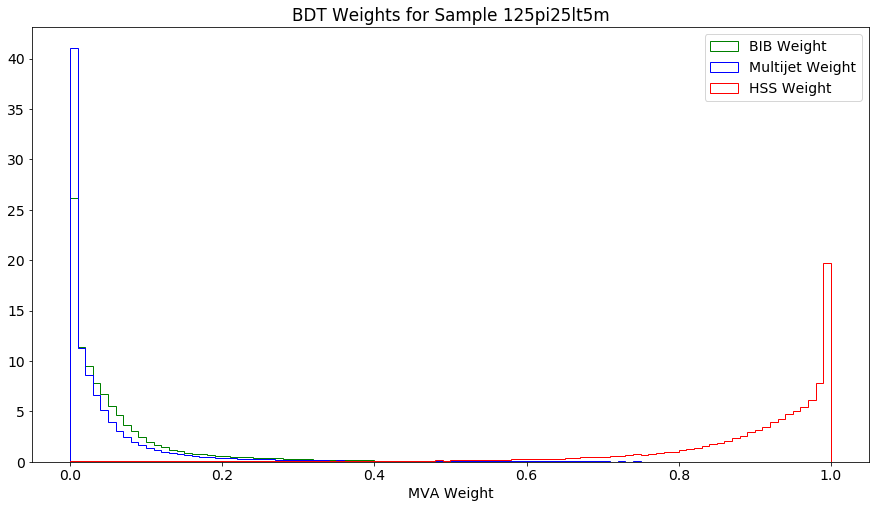

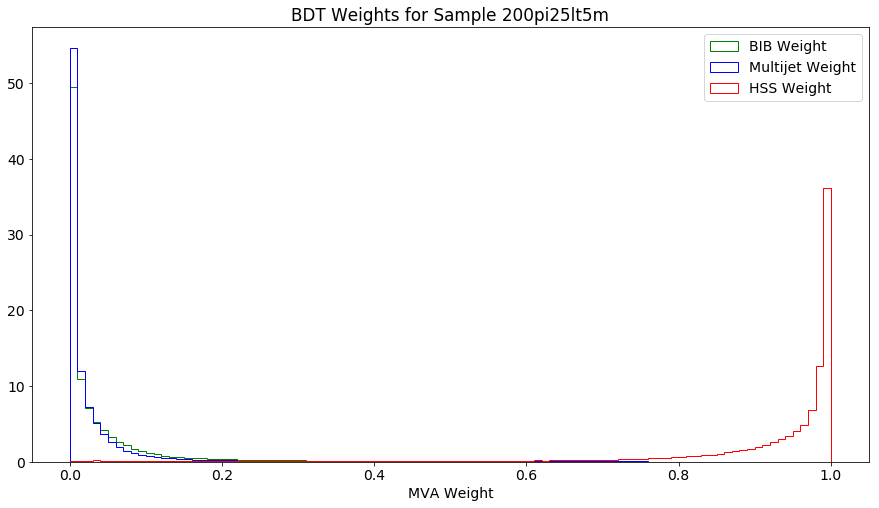

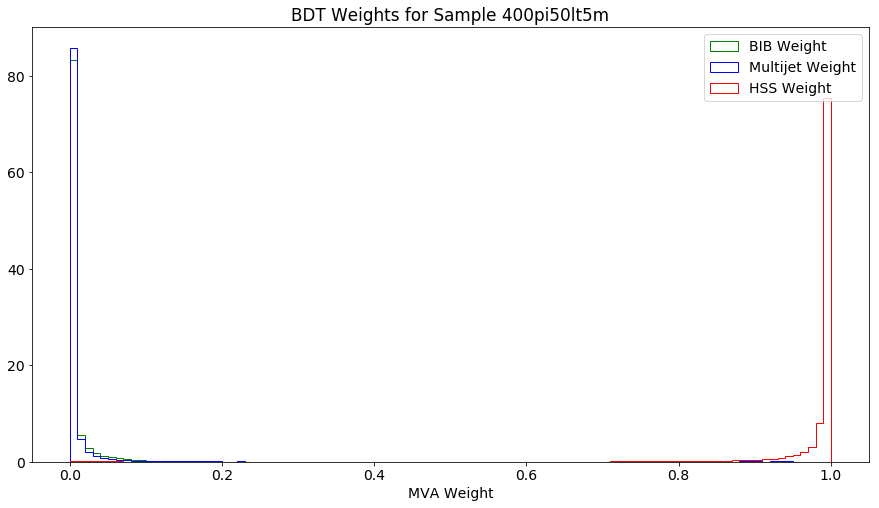

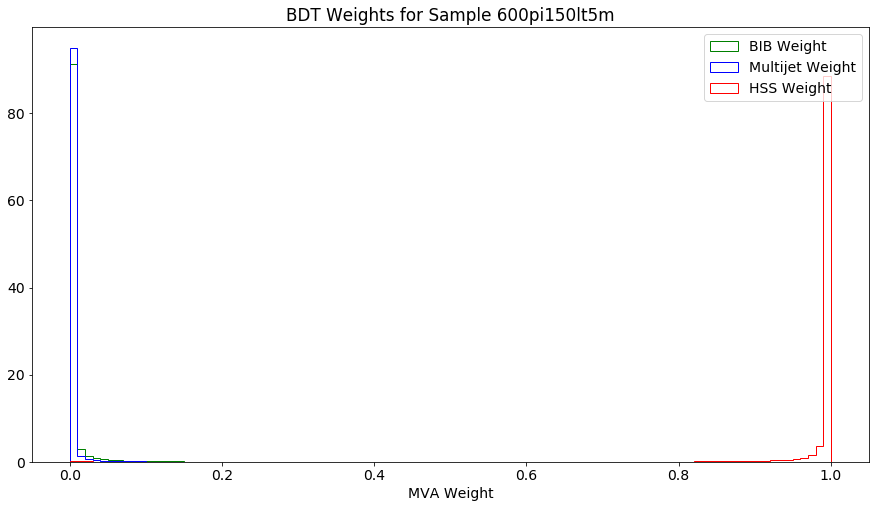

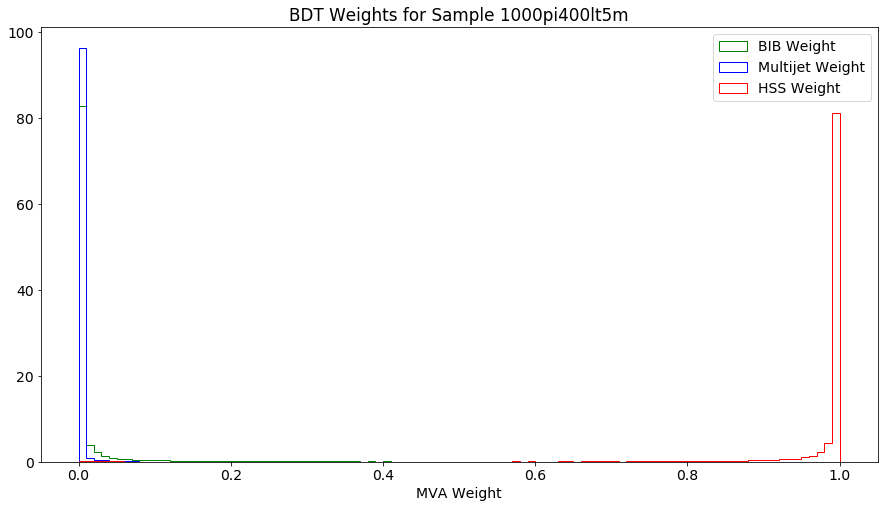

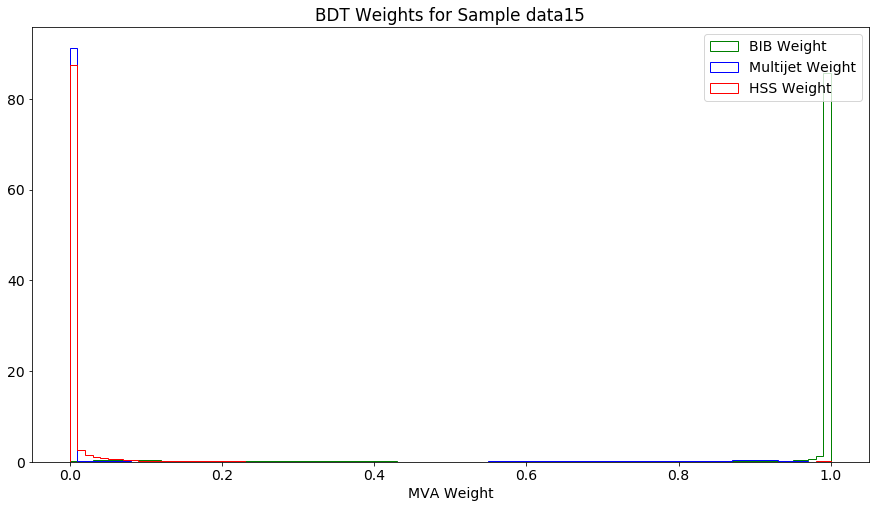

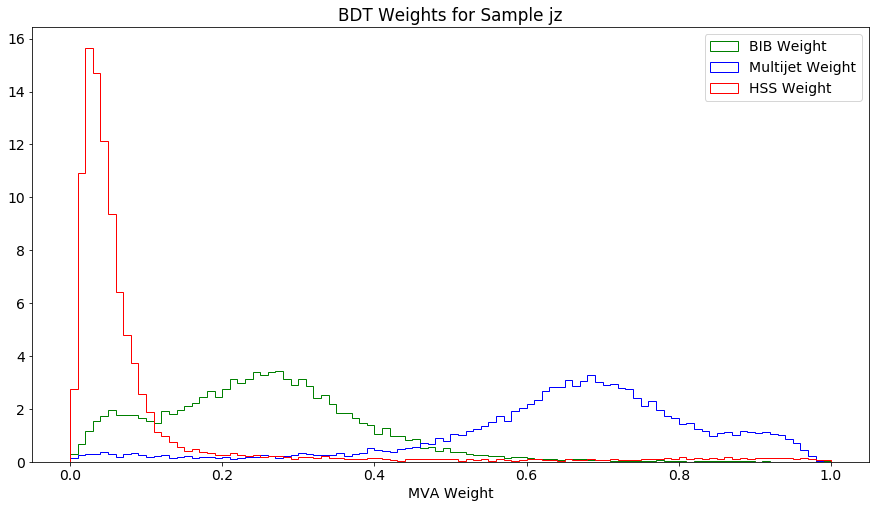

In [111]:
plot_mva_samples({**signal_samples, **bib_samples, **mj_samples})

## 3D Scatter Plots



In [133]:
def plot_mva_scatter_plot (sample_name, sample_data):
    """Plot the results as a scatter plot"""
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    plt.scatter(sample_data[" HSSWeight"], sample_data[" MultijetWeight"], sample_data[" BIBWeight"], marker='.')
    ax.set_xlabel('HSS')
    ax.set_ylabel('Multijet')
    ax.set_zlabel('BIB')
    plt.show()

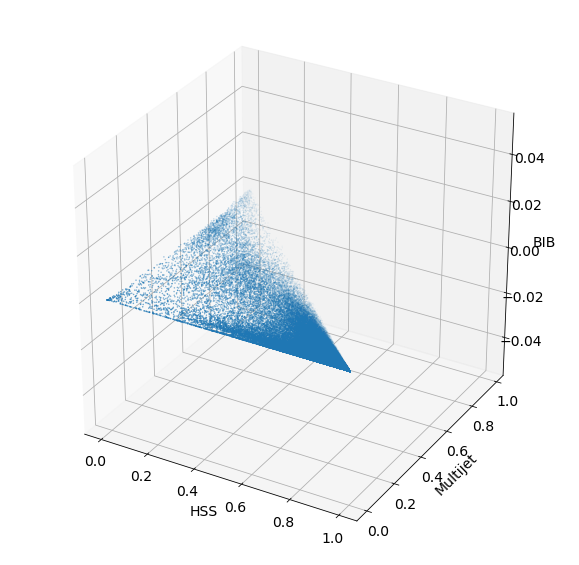

In [134]:
plot_mva_scatter_plot("dude", signal_samples["125pi25lt5m"])